# Loglikelihood Lapse Rate for Gorgo 11

3/3
Same as notebook_LLlapse_random, except we fitted Gorgo11 this time instead.

Performed by *generator_LLcheck_gorgo11_random_fitexperimentallt_sigmaxMratiosigmaoutput_301015.py*


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
from IPython.utils import io


from experimentlauncher import ExperimentLauncher
from dataio import DataIO
import plots_experimental_data
import em_circularmixture_parametrickappa


# import matplotlib.animation as plt_anim
from mpl_toolkits.mplot3d import Axes3D

import re
import inspect
import imp

import utils
# import submitpbs
import load_experimental_data

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo

In [5]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import * 

In [6]:
from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
from IPython.html.widgets import interact
from plotly.widgets import GraphWidget 

/nfs/nhome/live/lmatthey/Applications/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/nfs/nhome/live/lmatthey/Applications/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [7]:
%cd /nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/
%run reloader_LLlapse_gorgo11_random_fitexperimentallt_sigmaxMratiolapserate_301015.py

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015
Reloader data generated from  generator_LLlapse_gorgo11_random_fitexperimentallt_sigmaxMratiolapserate_301015.py
Running  /nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/reloader_LLlapse_gorgo11_random_fitexperimentallt_sigmaxMratiolapserate_301015.py
Arguments: []

        Reload outputs run with the automatic parameter generator for PBS

        Should handle random sampling of the parameter space.
    
Reloader data generated from  generator_LLlapse_gorgo11_random_fitexperimentallt_sigmaxMratiolapserate_301015.py
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-00409b5e-5261-499e-8906-ab7764a7cd98.npy
0.00%, -- left - 02.08 18:35
M 173.00, ratio_conj 0.47, sigmax 0.44, lap

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-05aa4360-9510-4a78-9483-458616da0fee.npy
1.89%, 4s left - 02.08 18:35
M 37.00, ratio_conj 0.68, sigmax 0.63, lapse_rate 0.02
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-05e3e8ac-1d03-4eb6-8411-b484f0027d5c.npy
1.94%, 4s left - 02.08 18:35
M 263.00, ratio_conj 0.86, sigmax 0.09, lapse_rate 0.03
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMra

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-0fc14521-caa2-4155-8c59-516a4c03b4c8.npy
6.60%, 4s left - 02.08 18:35
M 361.00, ratio_conj 1.00, sigmax 0.10, lapse_rate 0.15
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-0fd0fbe8-71a7-487d-a58a-b93a787b2fcb.npy
6.65%, 4s left - 02.08 18:35
M 178.00, ratio_conj 0.56, sigmax 0.69, lapse_rate 0.16
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMr

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-1beff84e-939f-45fd-914a-b6ae97404a10.npy
11.15%, 4s left - 02.08 18:35
M 360.00, ratio_conj 0.90, sigmax 0.06, lapse_rate 0.00
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-1c075f5e-e24a-47e4-bcc5-c21757a84a78.npy
11.20%, 4s left - 02.08 18:35
M 337.00, ratio_conj 0.50, sigmax 0.69, lapse_rate 0.11
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

M 358.00, ratio_conj 0.72, sigmax 0.26, lapse_rate 0.01
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-2af645b3-e0d5-4aed-b9a9-6af67164cac7.npy
15.95%, 4s left - 02.08 18:35
M 167.00, ratio_conj 0.72, sigmax 0.69, lapse_rate 0.10
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-2b58facd-647a-4450-96ec-508cc7e046a0.npy
16.00%, 4s left - 02.08 18:35
M 118.00, ratio_conj 0.54, sigmax 0.42, lapse_rate 0.04
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-369d0ee6-21df-4e7e-ad1e-dc1ee3098e75.npy
20.45%, 3s left - 02.08 18:35
M 188.00, ratio_conj 0.53, sigmax 0.42, lapse_rate 0.07
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-36af202e-e890-467e-a59d-57cec8153279.npy
20.50%, 3s left - 02.08 18:35
M 202.00, ratio_conj 0.71, sigmax 0.07, lapse_rate 0.18
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

M 100.00, ratio_conj 0.64, sigmax 0.38, lapse_rate 0.02
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-41f66738-6369-427f-baa3-15d82929c7c0.npy
24.74%, 3s left - 02.08 18:35
M 273.00, ratio_conj 0.82, sigmax 0.31, lapse_rate 0.12
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-4215ec3e-a3f4-437b-9c2b-b2f997ee5202.npy
24.80%, 3s left - 02.08 18:35
M 104.00, ratio_conj 0.62, sigmax 0.19, lapse_rate 0.12
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-4dbbde99-299a-4731-bd3a-ed5cceadf933.npy
29.35%, 3s left - 02.08 18:35
M 262.00, ratio_conj 0.55, sigmax 0.68, lapse_rate 0.15
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-4db46fcb-3f77-4e93-b1d0-c313f804126b.npy
29.40%, 3s left - 02.08 18:35
M 203.00, ratio_conj 0.60, sigmax 0.04, lapse_rate 0.14
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-56618635-dcf3-4fb1-bd8b-61c856940fc1.npy
32.52%, 3s left - 02.08 18:35
M 381.00, ratio_conj 0.76, sigmax 0.01, lapse_rate 0.00
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-566c2c21-ce17-4721-9764-b485fc4676e3.npy
32.57%, 3s left - 02.08 18:35
M 154.00, ratio_conj 0.94, sigmax 0.64, lapse_rate 0.07
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-61e23e2f-06ea-46b2-9350-76d464b9f68d.npy
37.47%, 3s left - 02.08 18:35
M 322.00, ratio_conj 0.61, sigmax 0.78, lapse_rate 0.14
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-61fd4760-b542-4325-8343-e6ec8c8d770a.npy
37.53%, 3s left - 02.08 18:35
M 53.00, ratio_conj 0.92, sigmax 0.43, lapse_rate 0.17
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxM

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-6c3220d2-3d24-4b21-a6de-e6393b5d88a2.npy
41.72%, 3s left - 02.08 18:35
M 173.00, ratio_conj 0.70, sigmax 0.14, lapse_rate 0.12
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-6ca252b6-c4af-4f29-9034-196e860f2e1c.npy
41.77%, 3s left - 02.08 18:35
M 26.00, ratio_conj 0.62, sigmax 0.77, lapse_rate 0.15
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxM

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-772060ba-e82b-487e-b4f8-22d6dfe3b5ef.npy
46.11%, 3s left - 02.08 18:35
M 102.00, ratio_conj 0.63, sigmax 0.55, lapse_rate 0.20
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-77472e90-93da-48ec-86fc-287d583e078d.npy
46.17%, 3s left - 02.08 18:35
M 360.00, ratio_conj 0.54, sigmax 0.78, lapse_rate 0.08
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-814db5a2-b3f6-4159-b780-11a7a4a86517.npy
50.51%, 2s left - 02.08 18:35
M 110.00, ratio_conj 0.91, sigmax 0.78, lapse_rate 0.09
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-81680096-a7c3-44eb-af57-38feb07db83f.npy
50.56%, 2s left - 02.08 18:35
M 135.00, ratio_conj 0.36, sigmax 0.72, lapse_rate 0.03
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-8d222ec0-64dd-4b08-8b19-7c114091f2ad.npy
54.96%, 2s left - 02.08 18:35
M 37.00, ratio_conj 0.68, sigmax 0.41, lapse_rate 0.20
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-8d5e0aa5-e4cf-463f-9cae-c6b45eb22eb1.npy
55.01%, 2s left - 02.08 18:35
M 150.00, ratio_conj 0.43, sigmax 0.34, lapse_rate 0.17
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxM

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-9866bd8a-88f6-4822-8846-d3bc064fa1d6.npy
59.25%, 2s left - 02.08 18:35
M 362.00, ratio_conj 0.71, sigmax 0.75, lapse_rate 0.04
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-987e943f-a70c-4986-8aa0-c5a9f825c6e8.npy
59.30%, 2s left - 02.08 18:35
M 74.00, ratio_conj 0.49, sigmax 0.10, lapse_rate 0.09
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxM

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-a20bbe51-4872-4b16-ad7e-9dc9242b73ba.npy
63.55%, 2s left - 02.08 18:35
M 9.00, ratio_conj 1.00, sigmax 0.15, lapse_rate 0.14
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-a262a69b-f5bf-4895-beb1-c499ff2deceb.npy
63.60%, 2s left - 02.08 18:35
M 266.00, ratio_conj 0.96, sigmax 0.09, lapse_rate 0.13
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMr

67.84%, 2s left - 02.08 18:35
M 299.00, ratio_conj 0.97, sigmax 0.15, lapse_rate 0.12
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-ac50d91c-1fa2-4b19-ab54-3aa7d4beb702.npy
67.89%, 2s left - 02.08 18:35
M 364.00, ratio_conj 0.89, sigmax 0.59, lapse_rate 0.11
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-ac36ff4a-6b20-4c14-81c8-fc79dff23ce9.npy
67.94%, 2s left - 02.08 18:35
M 163.00, ratio_conj 0.50, sigmax 0.73, lapse_rate 0.19
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sig

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-b61a3612-a4c8-449f-8b83-0694cbb939c4.npy
71.88%, 1s left - 02.08 18:35
M 110.00, ratio_conj 0.58, sigmax 0.20, lapse_rate 0.17
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-b63cf2b2-a218-4a13-b783-77cfc38d8126.npy
71.93%, 1s left - 02.08 18:35
M 17.00, ratio_conj 0.53, sigmax 0.70, lapse_rate 0.12
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxM

M 243.00, ratio_conj 0.93, sigmax 0.75, lapse_rate 0.07
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-c199cca5-36c5-429e-b44e-66789ad26718.npy
75.97%, 1s left - 02.08 18:35
M 72.00, ratio_conj 0.89, sigmax 0.57, lapse_rate 0.11
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-c1dea772-5959-40d0-97a1-b295de4125c9.npy
76.02%, 1s left - 02.08 18:35
M 270.00, ratio_conj 0.53, sigmax 0.69, lapse_rate 0.16
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-cbf3ca9b-2a00-42f4-9139-bed8e6e5b0ad.npy
79.96%, 1s left - 02.08 18:35
M 173.00, ratio_conj 0.98, sigmax 0.50, lapse_rate 0.09
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-cc2f78d1-bee8-4145-870e-fd09ab94720a.npy
80.01%, 1s left - 02.08 18:35
M 294.00, ratio_conj 0.49, sigmax 0.50, lapse_rate 0.11
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

M 147.00, ratio_conj 0.55, sigmax 0.29, lapse_rate 0.20
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-d606a3d5-bb26-46c3-9d3d-69d9d0d340ee.npy
84.00%, 1s left - 02.08 18:35
M 142.00, ratio_conj 0.45, sigmax 0.19, lapse_rate 0.05
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-d613701e-3b3e-436e-b694-073b14840aba.npy
84.05%, 1s left - 02.08 18:35
M 289.00, ratio_conj 0.58, sigmax 0.20, lapse_rate 0.10
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-e18b3d32-5b3d-46ac-88a8-be9bdd177e3d.npy
88.09%, 1s left - 02.08 18:35
M 132.00, ratio_conj 0.48, sigmax 0.67, lapse_rate 0.05
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-e249379d-4720-410f-9b00-320690128927.npy
88.14%, 1s left - 02.08 18:35
M 337.00, ratio_conj 0.50, sigmax 0.48, lapse_rate 0.15
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-ebb1aa50-afdf-4fe1-88dd-8effe330433a.npy
91.87%, 0s left - 02.08 18:35
M 356.00, ratio_conj 0.91, sigmax 0.28, lapse_rate 0.02
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-ebfb3697-0656-4b1c-9ecc-be39d1d89c07.npy
91.92%, 0s left - 02.08 18:35
M 321.00, ratio_conj 0.53, sigmax 0.71, lapse_rate 0.19
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmax

M 368.00, ratio_conj 0.39, sigmax 0.15, lapse_rate 0.06
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-f5fed6aa-99bf-4067-9c4b-50e4c6825653.npy
95.81%, 0s left - 02.08 18:35
M 158.00, ratio_conj 0.91, sigmax 0.25, lapse_rate 0.08
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-f596c7c0-7dcb-4ac8-8292-4a498c816e6f.npy
95.86%, 0s left - 02.08 18:35
M 256.00, ratio_conj 0.77, sigmax 0.74, lapse_rate 0.18
/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions

/nfs/data3/lmatthey/visual_working_mem/fitexperiment_allt_new_10_2015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015/LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-ffe3eb16-431a-4a94-8188-de10c183cccd.npy
99.95%, -- left - 02.08 18:35
M 89.00, ratio_conj 0.55, sigmax 0.49, lapse_rate 0.13
Found new results_shape: (5, 3)
Result is not array, file looks bad: ./LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-591f8321-e725-4470-999b-415c490848c5
Result is not array, file looks bad: ./LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-e5674d88-1cd7-4e05-964b-50540bca7415
Result is not array, file looks bad: ./LLlapse_random_fitexperimentallt_gorgo11_sigmaxMratiolapserate_repetitions3_301015-launcher_do_fitexperiment_allmetrics-fa3db54f-3106-49d5

In [8]:
#### SETUP
#
plots_bestfits = True
plots_scatter3d = False

savefigs = True

# dataio = DataIO(output_folder=generator_module.pbs_submission_infos['simul_out_dir'] + '/outputs/', label='global_' + dataset_infos['save_output_filename'])

#
#### /SETUP

In [9]:
# Extract data
result_ll_sum_flat = np.array(data_pbs.dict_arrays['result_ll_sum']['results_flat'])
result_ll90_sum_flat = np.array(data_pbs.dict_arrays['result_ll90_sum']['results_flat'])
result_bic_flat = np.array(data_pbs.dict_arrays['result_bic']['results_flat'])
result_precision_flat = np.array(data_pbs.dict_arrays['result_precision']['results_flat'])
result_em_fits_flat = np.array(data_pbs.dict_arrays['result_em_fits']['results_flat'])
result_emfit_mse_flat = np.array(data_pbs.dict_arrays['result_emfit_mse']['results_flat'])
result_emfit_mixt_kl_flat = np.array(data_pbs.dict_arrays['result_emfit_mixt_kl']['results_flat'])
result_fi_theo_flat = np.array(data_pbs.dict_arrays['result_fi_theo']['results_flat'])
result_fi_theocov_flat = np.array(data_pbs.dict_arrays['result_fi_theocov']['results_flat'])

result_parameters_flat = np.array(data_pbs.dict_arrays['result_ll_sum']['parameters_flat'])
all_repeats_completed = data_pbs.dict_arrays['result_ll_sum']['repeats_completed']

all_args_arr = np.array(data_pbs.loaded_data['args_list'])

M_space = data_pbs.loaded_data['parameters_uniques']['M']
ratio_conj_space = data_pbs.loaded_data['parameters_uniques']['ratio_conj']
sigmax_space = data_pbs.loaded_data['parameters_uniques']['sigmax']
lapserate_space = data_pbs.loaded_data['parameters_uniques']['lapse_rate']

num_repetitions = generator_module.num_repetitions
parameter_names_sorted = data_pbs.dataset_infos['parameters']

In [10]:
def str_best_params(best_i, result_dist_to_use):
    return '[{:3d}] '.format(best_ind) + ' '.join(["%s %.4f" % (parameter_names_sorted[param_i], result_parameters_flat[best_i, param_i]) 
                     for param_i in xrange(len(parameter_names_sorted))]) + ' >> %f' % result_dist_to_use[best_i]


In [11]:
def sort_df_best_params(df_to_use, metric, nb_params):
    return df_to_use.sort(metric)[:nb_params]

def print_str_best_params_df(df_to_use, metric, nb_params):
    df_sorted = sort_df_best_params(df_to_use, metric, nb_params)
    
    metric_space = ['dist_emfit_mse', 'dist_emfit_kl', 'dist_nll', 'dist_nll90', 'dist_bic']
    
    print 'Best for %s' % metric
    print '[  i ] ' + ' '.join(["%s" % param for param in parameter_names_sorted]) + \
    ' >> ' + ' '.join(["%s" % metric for metric in metric_space])
    
    for row_i, row in df_sorted.iterrows():
        print "[{:4d}] ".format(row_i) + \
        ' '.join(["%.4f" % (row[param]) for param in parameter_names_sorted]) + \
        ' >> ' + ' '.join(["%.4f" % row[curr_metric] for curr_metric in metric_space])


In [12]:
# Reload experimental data
experiment_id = all_args_arr[0]['experiment_id']
data_groundtruth = load_experimental_data.load_data(experiment_id=experiment_id)
T_space = data_groundtruth['data_to_fit']['n_items']

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/em_gorgo_sim_basicmodel.pickle
reloaded collapsed mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/collapsed_em_gorgo_sim_new.pickle


In [13]:
## Filter everything with repeats_completed == num_repet
filter_data = all_repeats_completed == num_repetitions - 1

result_parameters_flat = result_parameters_flat[filter_data]
all_args_arr = all_args_arr[filter_data]
all_repeats_completed = all_repeats_completed[filter_data]

print "Size post-filter: ", result_parameters_flat.shape[0]


Size post-filter:  1953


In [14]:
# Compute lots of averages over the repetitions
result_ll_sum_avg = utils.nanmean(result_ll_sum_flat, axis=-1)
result_ll90_sum_avg = utils.nanmean(result_ll90_sum_flat, axis=-1)
result_bic_avg = utils.nanmean(result_bic_flat, axis=-1)
result_em_fits_avg = utils.nanmean(result_em_fits_flat, axis=-1)
result_emfit_mse_avg = utils.nanmean(result_emfit_mse_flat, axis=-1)
result_emfit_mixt_kl_avg = utils.nanmean(result_emfit_mixt_kl_flat, axis=-1)

# Compute best results
result_dist_emfit_mse = np.nansum(np.nansum(result_emfit_mse_avg, axis=-1), axis=-1)
result_dist_emfit_kl = np.nansum(result_emfit_mixt_kl_avg, axis=-1)
result_dist_nll = np.nansum(-result_ll_sum_avg, axis=-1)
result_dist_nll90 = np.nansum(-result_ll90_sum_avg, axis=-1)
result_dist_bic = np.nansum(result_bic_avg, axis=-1)

## -> Pandas now

In [15]:
df_all_fits = pd.DataFrame.from_items([('M', result_parameters_flat[:, 0]),
                             ('ratio_conj', result_parameters_flat[:, 1]),
                             ('sigmax', result_parameters_flat[:, 2]),
                             ('lapse_rate', result_parameters_flat[:, 3]),
                             ('dist_emfit_mse', result_dist_emfit_mse),
                             ('dist_emfit_kl', result_dist_emfit_kl),
                             ('dist_nll', result_dist_nll),
                             ('dist_nll90', result_dist_nll90),
                             ('dist_bic', result_dist_bic),
                            ])
df_all_fits = df_all_fits.assign(dist_emfit_mse_log = lambda x: np.log(x['dist_emfit_mse']),
                                   dist_nll_log = lambda x: np.log(x['dist_nll'])
                                  )

In [16]:
# Filter rows where LL > cutoff value and remove lapse_rate > cutoff
LL_max_cutoff = 3500
LL_min_cutoff = 0
lapserate_cutoff = 0.5
sigmax_min_cutoff = 0.05

df_best_fits = df_all_fits[df_all_fits.dist_nll < LL_max_cutoff]
df_best_fits = df_best_fits[df_best_fits.dist_nll > LL_min_cutoff]
df_best_fits = df_best_fits[df_best_fits.lapse_rate < lapserate_cutoff]
df_best_fits = df_best_fits[df_best_fits.sigmax > sigmax_min_cutoff]

In [17]:
## Correlations
df_best_fits.corr()

,M,ratio_conj,sigmax,lapse_rate,dist_emfit_mse,dist_emfit_kl,dist_nll,dist_nll90,dist_bic,dist_emfit_mse_log,dist_nll_log
M,1.000000,0.374362,0.551957,0.177578,0.054151,-0.218603,0.411374,0.140502,0.411374,-0.063991,0.411917
ratio_conj,0.374362,1.000000,0.361873,0.026451,0.077499,-0.510645,-0.003977,-0.097891,-0.003977,0.157812,-0.001936
sigmax,0.551957,0.361873,1.000000,-0.046733,-0.349011,0.215102,0.576245,0.551479,0.576245,-0.372908,0.578322
lapse_rate,0.177578,0.026451,-0.046733,1.000000,0.197967,0.204689,-0.189591,0.204164,-0.189591,0.151461,-0.189838
dist_emfit_mse,0.054151,0.077499,-0.349011,0.197967,1.000000,-0.323271,0.099134,0.011604,0.099134,0.718862,0.099206
dist_emfit_kl,-0.218603,-0.510645,0.215102,0.204689,-0.323271,1.000000,0.374044,0.729330,0.374044,-0.289193,0.372899
dist_nll,0.411374,-0.003977,0.576245,-0.189591,0.099134,0.374044,1.000000,0.785651,1.000000,0.097120,0.999645
dist_nll90,0.140502,-0.097891,0.551479,0.204164,0.011604,0.729330,0.785651,1.000000,0.785651,0.062002,0.785861
dist_bic,0.411374,-0.003977,0.576245,-0.189591,0.099134,0.374044,1.000000,0.785651,1.000000,0.097120,0.999645
dist_emfit_mse_log,-0.063991,0.157812,-0.372908,0.151461,0.718862,-0.289193,0.097120,0.062002,0.097120,1.000000,0.097387


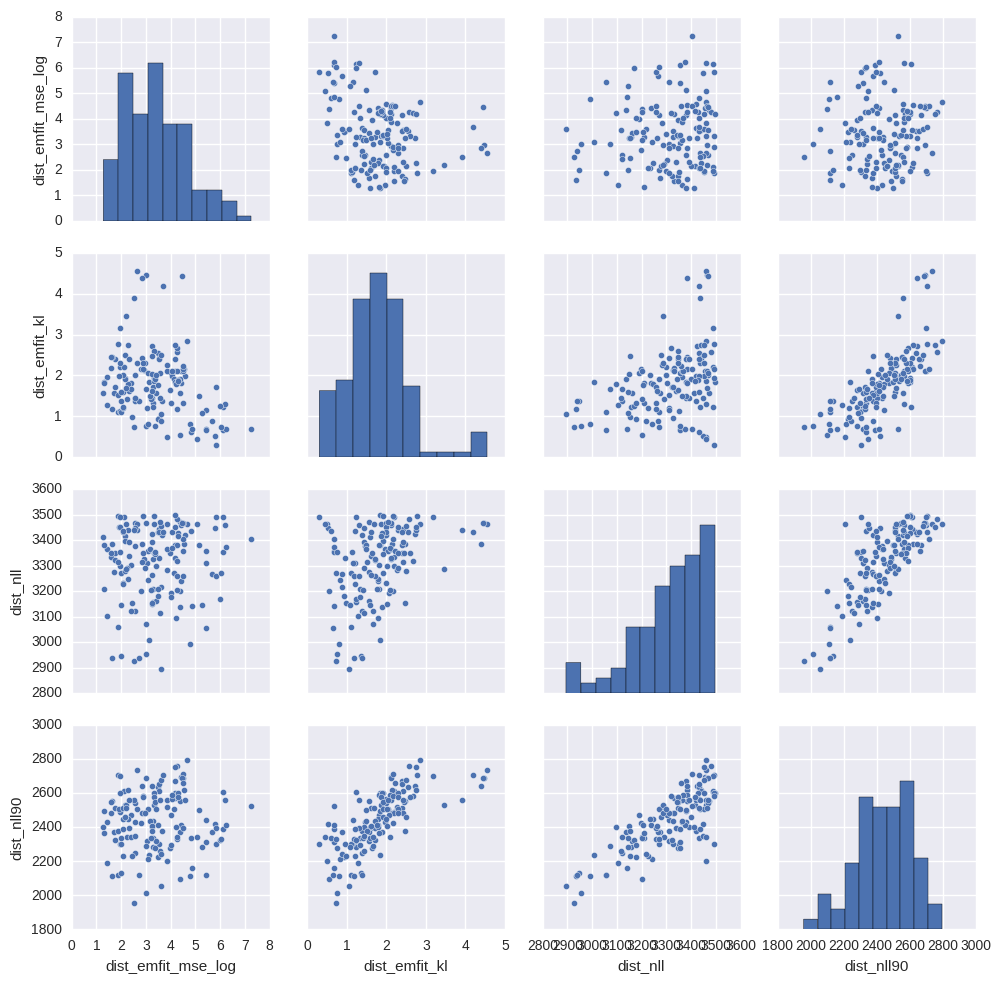

In [18]:
# Cross-correlation plots
sns.pairplot(df_best_fits,
             x_vars=['dist_emfit_mse_log', 'dist_emfit_kl', 'dist_nll', 'dist_nll90'],
             y_vars=['dist_emfit_mse_log', 'dist_emfit_kl', 'dist_nll', 'dist_nll90']
            )

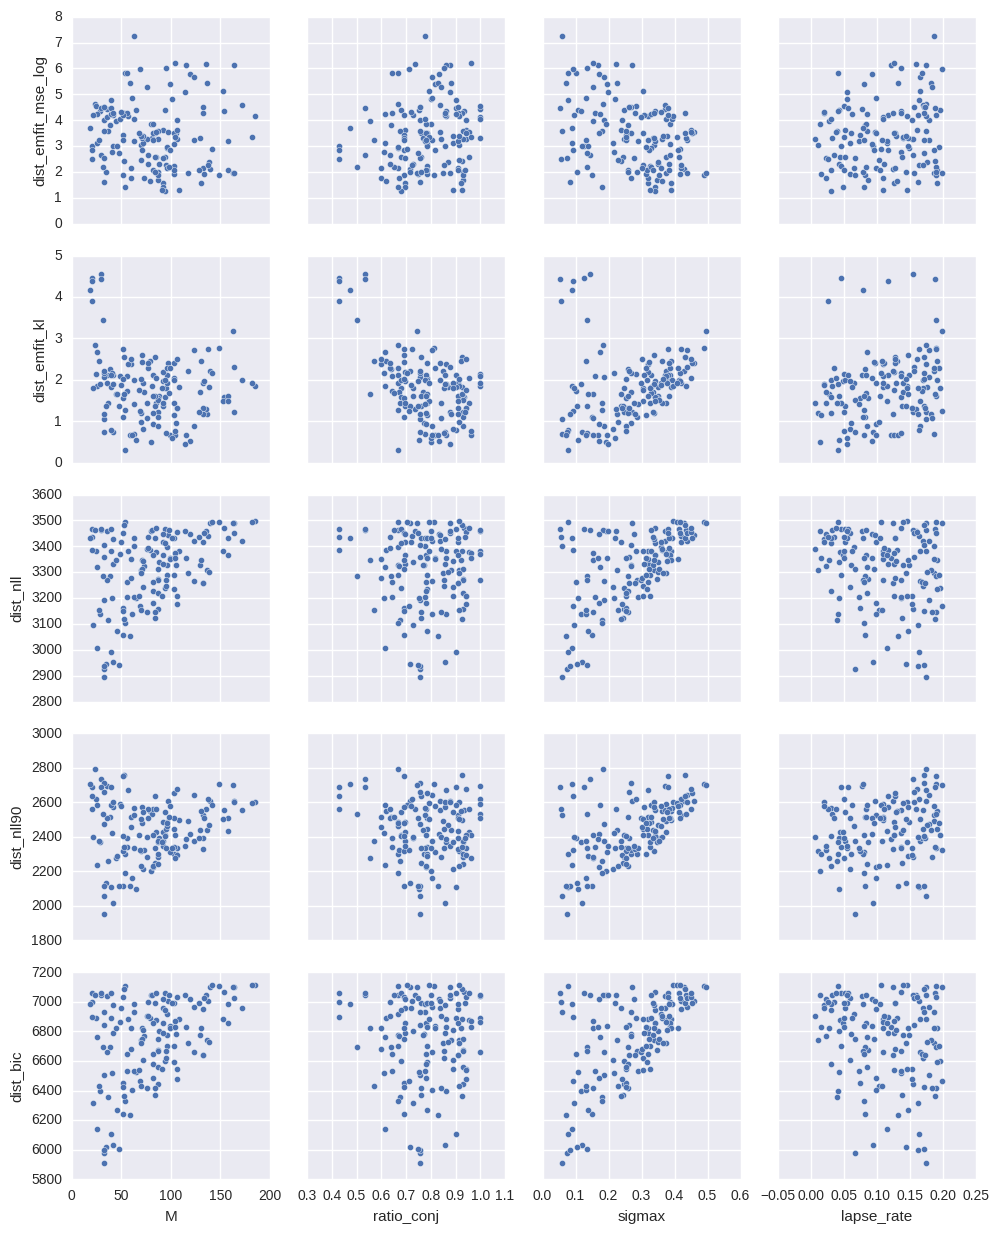

In [19]:
# Check parameters effects
sns.pairplot(df_best_fits,
             x_vars=['M', 'ratio_conj', 'sigmax', 'lapse_rate'],
             y_vars=['dist_emfit_mse_log', 'dist_emfit_kl', 'dist_nll', 'dist_nll90', 'dist_bic']
            )

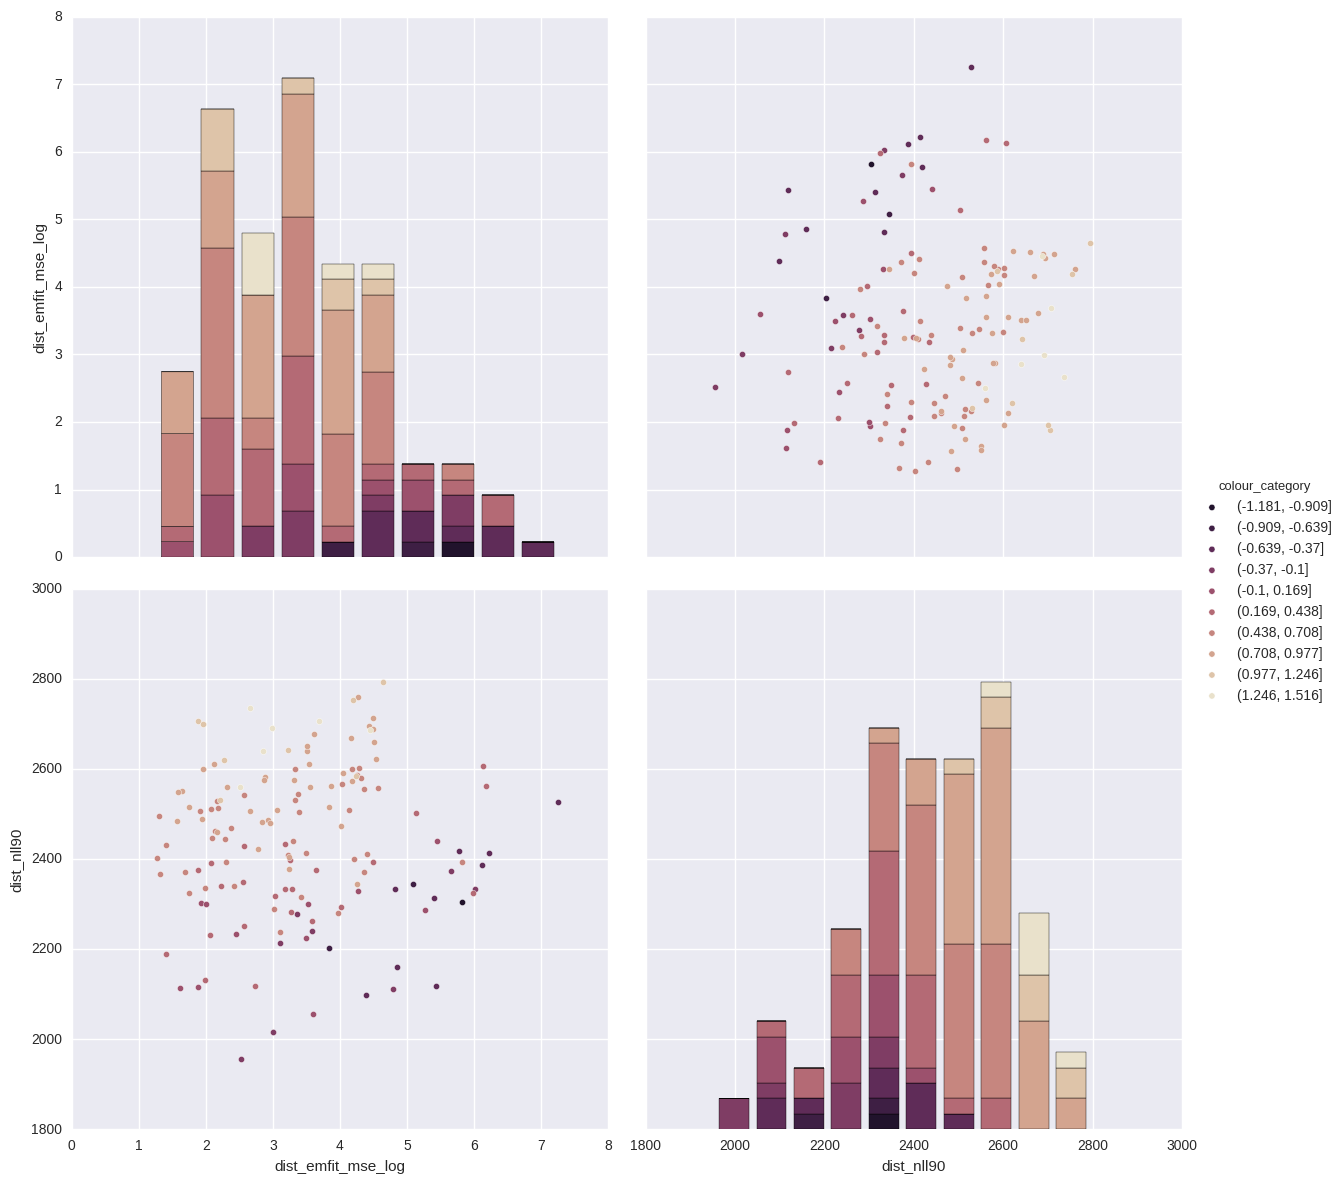

In [20]:
# Color code for Colour KL fit this time 
mycubehelix = sns.cubehelix_palette(dark=0.15, n_colors=10, start=0, rot=0.5, gamma=1.2, hue=0.9, light=0.9, reverse=True)
sns.pairplot(df_best_fits.assign(colour_category=pd.cut(np.log(df_best_fits['dist_emfit_kl']), bins=10)),
             hue='colour_category',
             palette=mycubehelix,
             vars=['dist_emfit_mse_log', 'dist_nll90'],
             size = 6
            )

## Plotly Scatter3d

In [121]:
# result_to_color = np.array(df_best_fits.dist_nll90)

# col_min = np.min(result_to_color)
# col_max = np.max(result_to_color)

# text = ['> %s' % (x) for x in result_to_color]

# trace1 = Scatter3d(
#         x= df_best_fits.M,
#         y= df_best_fits.ratio_conj,
#         z= df_best_fits.sigmax,
#         text= text,
#         mode= 'markers',
#         marker= Marker(
#             color = result_to_color,
#             size = 7,
#             colorscale='Bluered',
#             cmin=col_min,
#             cmax=col_max,
#             cauto=False
#         )
#     )
# data = Data([trace1])
# layout = Layout(
#     title='Landscape for NLL90',
#     scene=Scene(
#         xaxis=XAxis(
#             title=df_best_fits.columns.values[0],
#         ),
#         yaxis=YAxis(
#             title=df_best_fits.columns.values[1],
#         ),
#         zaxis=ZAxis(
#             title=df_best_fits.columns.values[2],
#         )
#     )
# )
# fig = Figure(data=data, layout=layout)
# scatter3d_url = py.plot(fig)

In [122]:
# dropdown_space = parameter_names_sorted
# dropdown_default = 'lapse_rate'
# metric_color_space = ['dist_emfit_mse', 'dist_emfit_kl', 'dist_nll', 'dist_nll90', 'dist_bic']
# metric_color_default = 'dist_nll90'

# g = GraphWidget(scatter3d_url)

# class shifter:
#     def __init__(self):
#         self.slider_index = 0
#         self.marker_size = 8
#         self.filter_results = slice(None, None)
#         self.metric_color = metric_color_default
#         self.dropdown_value = dropdown_default
        
#         self.change_color_source(metric_color_default)
#         self.change_dropdown_value(dropdown_default)
    
#     def change_dropdown_value(self, new_value):
#         self.dropdown_value = new_value
        
#         # Update the axes
#         self.axes_parameters = dropdown_space[:]
#         self.axes_parameters.remove(self.dropdown_value)
        
#         # Update the grid of the dropdown parameter
#         self.dropparam_gridified, self.dropparam_gridspace, self.dropparam_midspace = utils.gridify(df_best_fits[self.dropdown_value], bins=10)
        
        
    
#     def change_color_source(self, new_value):
#         self.metric_color = new_value
#         self.result_to_color = np.array(df_best_fits[self.metric_color])
#         self.result_to_color[self.result_to_color > 2*np.median(self.result_to_color)] = np.median(self.result_to_color)
#         self.col_min = np.min(self.result_to_color)
#         self.col_max = np.max(self.result_to_color)
    
#     def on_color_source_change(self, name, old_value, new_value):
#         self.change_color_source(new_value)
#         self.replot()
    
#     def on_dropdown_change(self, name, old_value, new_value):
#         self.change_dropdown_value(new_value)
#         p_slider.description='%s [all]' % self.dropdown_value
#         self.replot()
    
#     def on_slider_change(self, name, old_value, new_value):
#         self.slider_index = new_value
        
#         if self.slider_index > -1:
#             self.filter_results = self.dropparam_gridified[self.slider_index]
#             self.marker_size = 6
#             p_slider.description='%s [%f]' % (self.dropdown_value, self.dropparam_gridspace[self.slider_index])
#         else:
#             self.filter_results = slice(None, None)
#             self.marker_size = 6
#             p_slider.description='%s [all]' % self.dropdown_value
        
#         self.text = ['%s > %s' % (x[0], x[1]) for x in 
#                      zip(df_best_fits[self.dropdown_value][self.filter_results], self.result_to_color[self.filter_results])]
        
#         self.replot()
        
#     def replot(self):
#         self.text = ['%s > %s' % (x[0], x[1]) for x in 
#                      zip(df_best_fits[self.dropdown_value][self.filter_results], self.result_to_color[self.filter_results])]
        
#         new_trace = Scatter3d(
#             x= df_best_fits[self.axes_parameters[0]][self.filter_results],
#             y= df_best_fits[self.axes_parameters[1]][self.filter_results],
#             z= df_best_fits[self.axes_parameters[2]][self.filter_results],
#             text= self.text,
#             mode= 'markers',
#             marker= Marker(
#                 color = self.result_to_color[self.filter_results],
#                 size = self.marker_size,
#                 colorscale='Bluered',
#                 cmin=self.col_min,
#                 cmax=self.col_max,
#                 cauto=False
#             )
#         )
#         g.restyle({'x': [[]], 'y': [[]], 'z': [[]], 'marker':None, })
#         g.relayout({'title' : "Landscape for %s" % self.metric_color,
#                     'scene.xaxis.title': self.axes_parameters[0],
#                     'scene.yaxis.title': self.axes_parameters[1],
#                     'scene.zaxis.title': self.axes_parameters[2],
#                     })
#         g.add_traces(new_trace)

# p_state = shifter()
# p_metric_drop = widgets.Dropdown(description='Metric for color', options=metric_color_space, value=metric_color_default)
# p_variable_drop = widgets.Dropdown(description='Variable to slide', options=dropdown_space, value=dropdown_default)
# p_slider = widgets.IntSlider(min=-1, max=p_state.dropparam_midspace.size-1, value=-1)
# p_slider.description='%s [all]' % p_state.dropdown_value

# p_slider.on_trait_change(p_state.on_slider_change, 'value')
# p_variable_drop.on_trait_change(p_state.on_dropdown_change, 'value')
# p_metric_drop.on_trait_change(p_state.on_color_source_change, 'value')

# p_state.replot()

In [21]:
# display(p_metric_drop)
# display(p_variable_drop)
# display(p_slider)
# display(g)

## Look at best parameters


In [22]:
max_best_params = 10

print_str_best_params_df(df_best_fits, 'dist_emfit_mse', max_best_params)
print

print_str_best_params_df(df_best_fits, 'dist_emfit_kl', max_best_params)
print

print_str_best_params_df(df_best_fits, 'dist_nll', max_best_params)
print

print_str_best_params_df(df_best_fits, 'dist_nll90', max_best_params)
print

print_str_best_params_df(df_best_fits, 'dist_bic', max_best_params)

Best for dist_emfit_mse
[  i ] M ratio_conj sigmax lapse_rate >> dist_emfit_mse dist_emfit_kl dist_nll dist_nll90 dist_bic
[ 930] 94.0000 0.6809 0.3398 0.0305 >> 3.5906 1.5795 3411.9229 2402.7299 6948.1380
[ 366] 108.0000 0.9259 0.3889 0.1087 >> 3.6684 1.8323 3380.9096 2496.5070 6886.1113
[1912] 91.0000 0.8901 0.3248 0.1461 >> 3.7539 1.8143 3209.2987 2368.0099 6542.8895
[ 319] 92.0000 0.6957 0.3407 0.0482 >> 4.0949 1.9683 3365.3506 2430.9347 6854.9933
[1532] 54.0000 0.6667 0.1803 0.0798 >> 4.1132 1.2757 3104.1313 2190.0758 6332.5548
[ 139] 92.0000 0.6957 0.3206 0.1253 >> 4.8038 2.1885 3332.4955 2484.1813 6789.2832
[ 956] 131.0000 0.9237 0.3908 0.1912 >> 4.8490 2.4504 3347.9892 2549.8920 6820.2705
[1369] 33.0000 0.7576 0.0826 0.1615 >> 5.0049 1.1737 2937.0601 2113.9416 5998.4124
[ 413] 79.0000 0.6203 0.3635 0.1311 >> 5.1725 2.4602 3384.1010 2551.5032 6892.4942
[ 213] 87.0000 0.9310 0.3474 0.0865 >> 5.4353 1.5690 3274.5732 2371.0732 6673.4385

Best for dist_emfit_kl
[  i ] M ratio_conj s

/nfs/nhome/live/lmatthey/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



WARNING, THIS IS FITTED ON FULL DATA, NOT 500 FIRST SAMPLES AS OUR MODEL


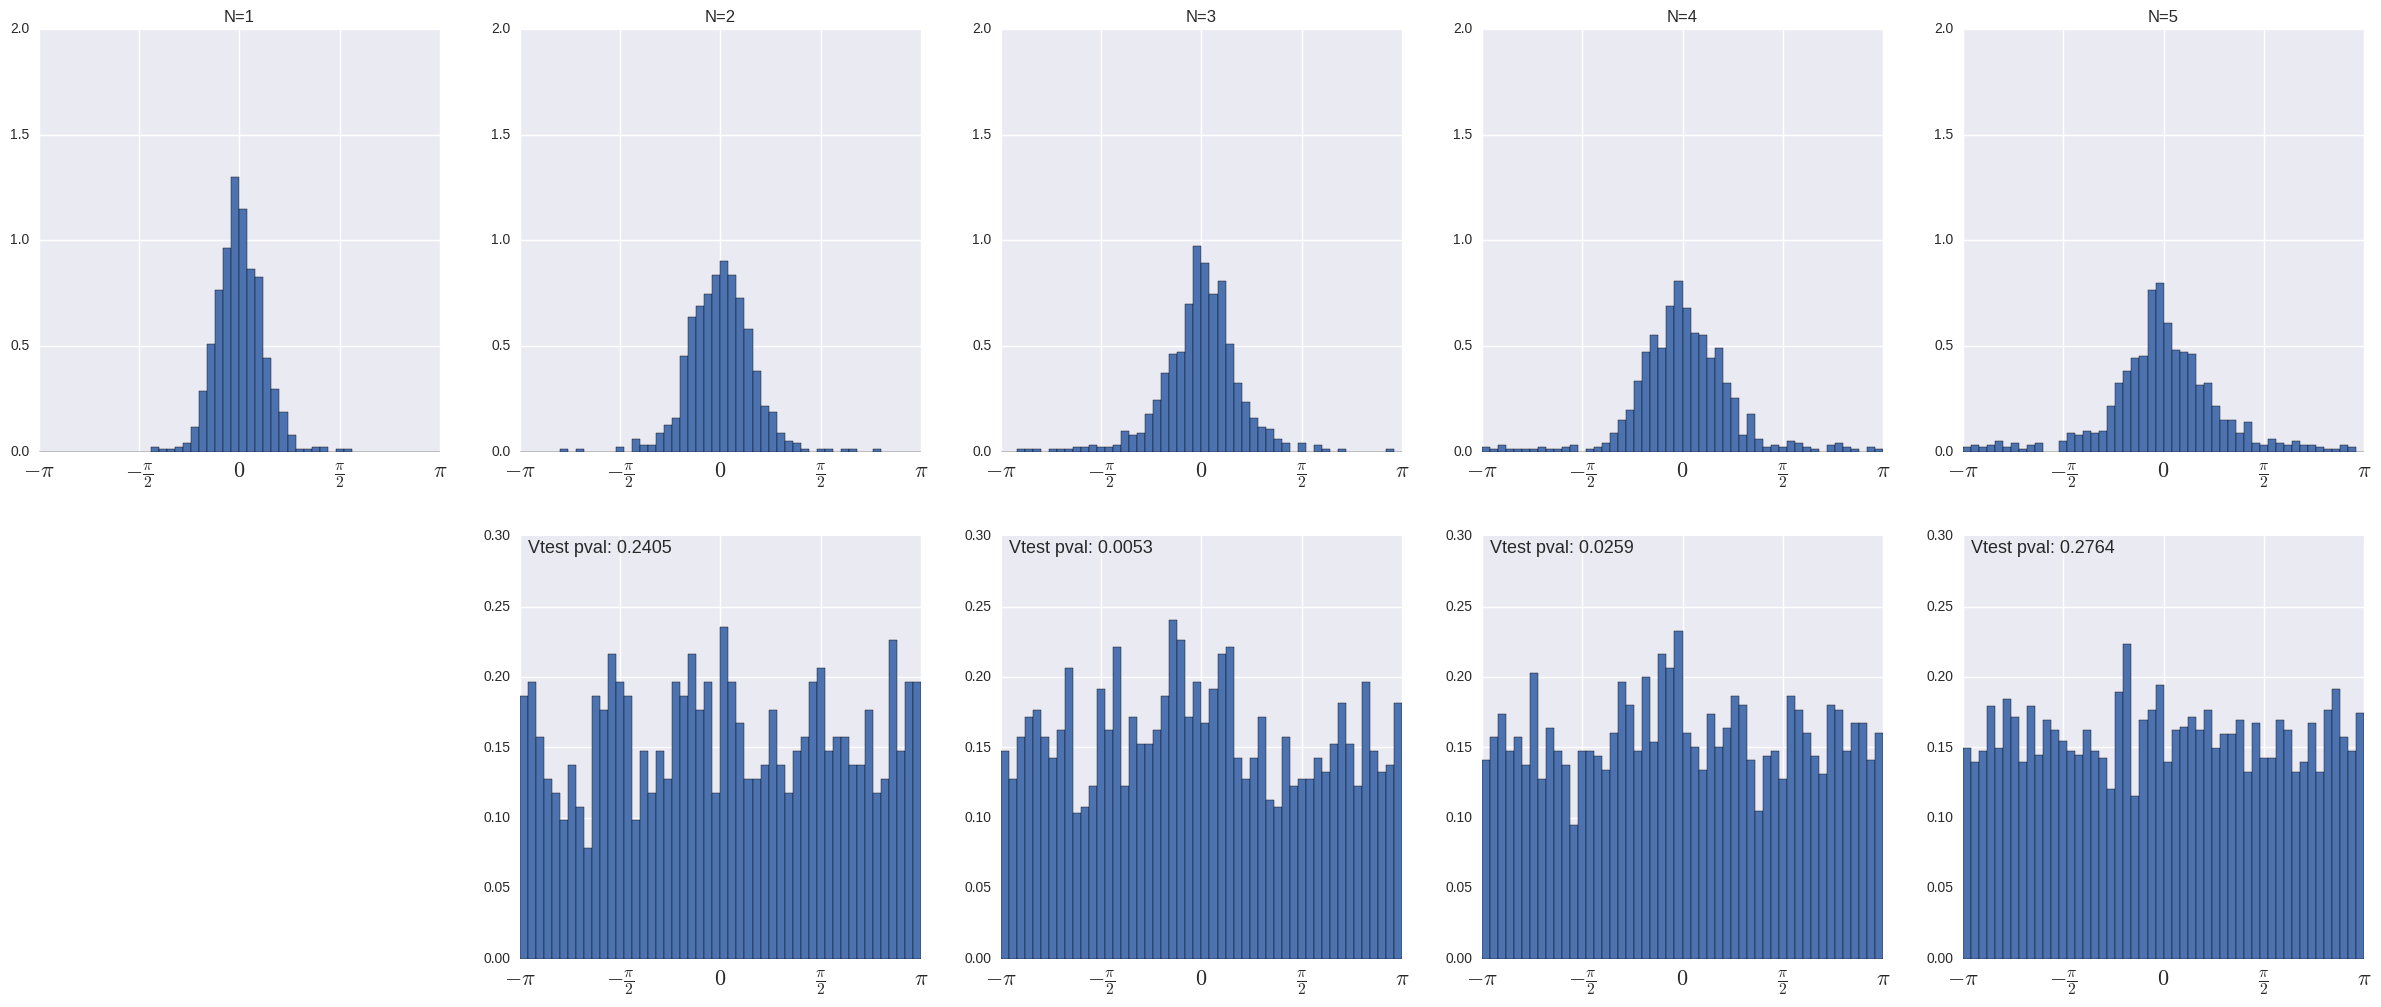

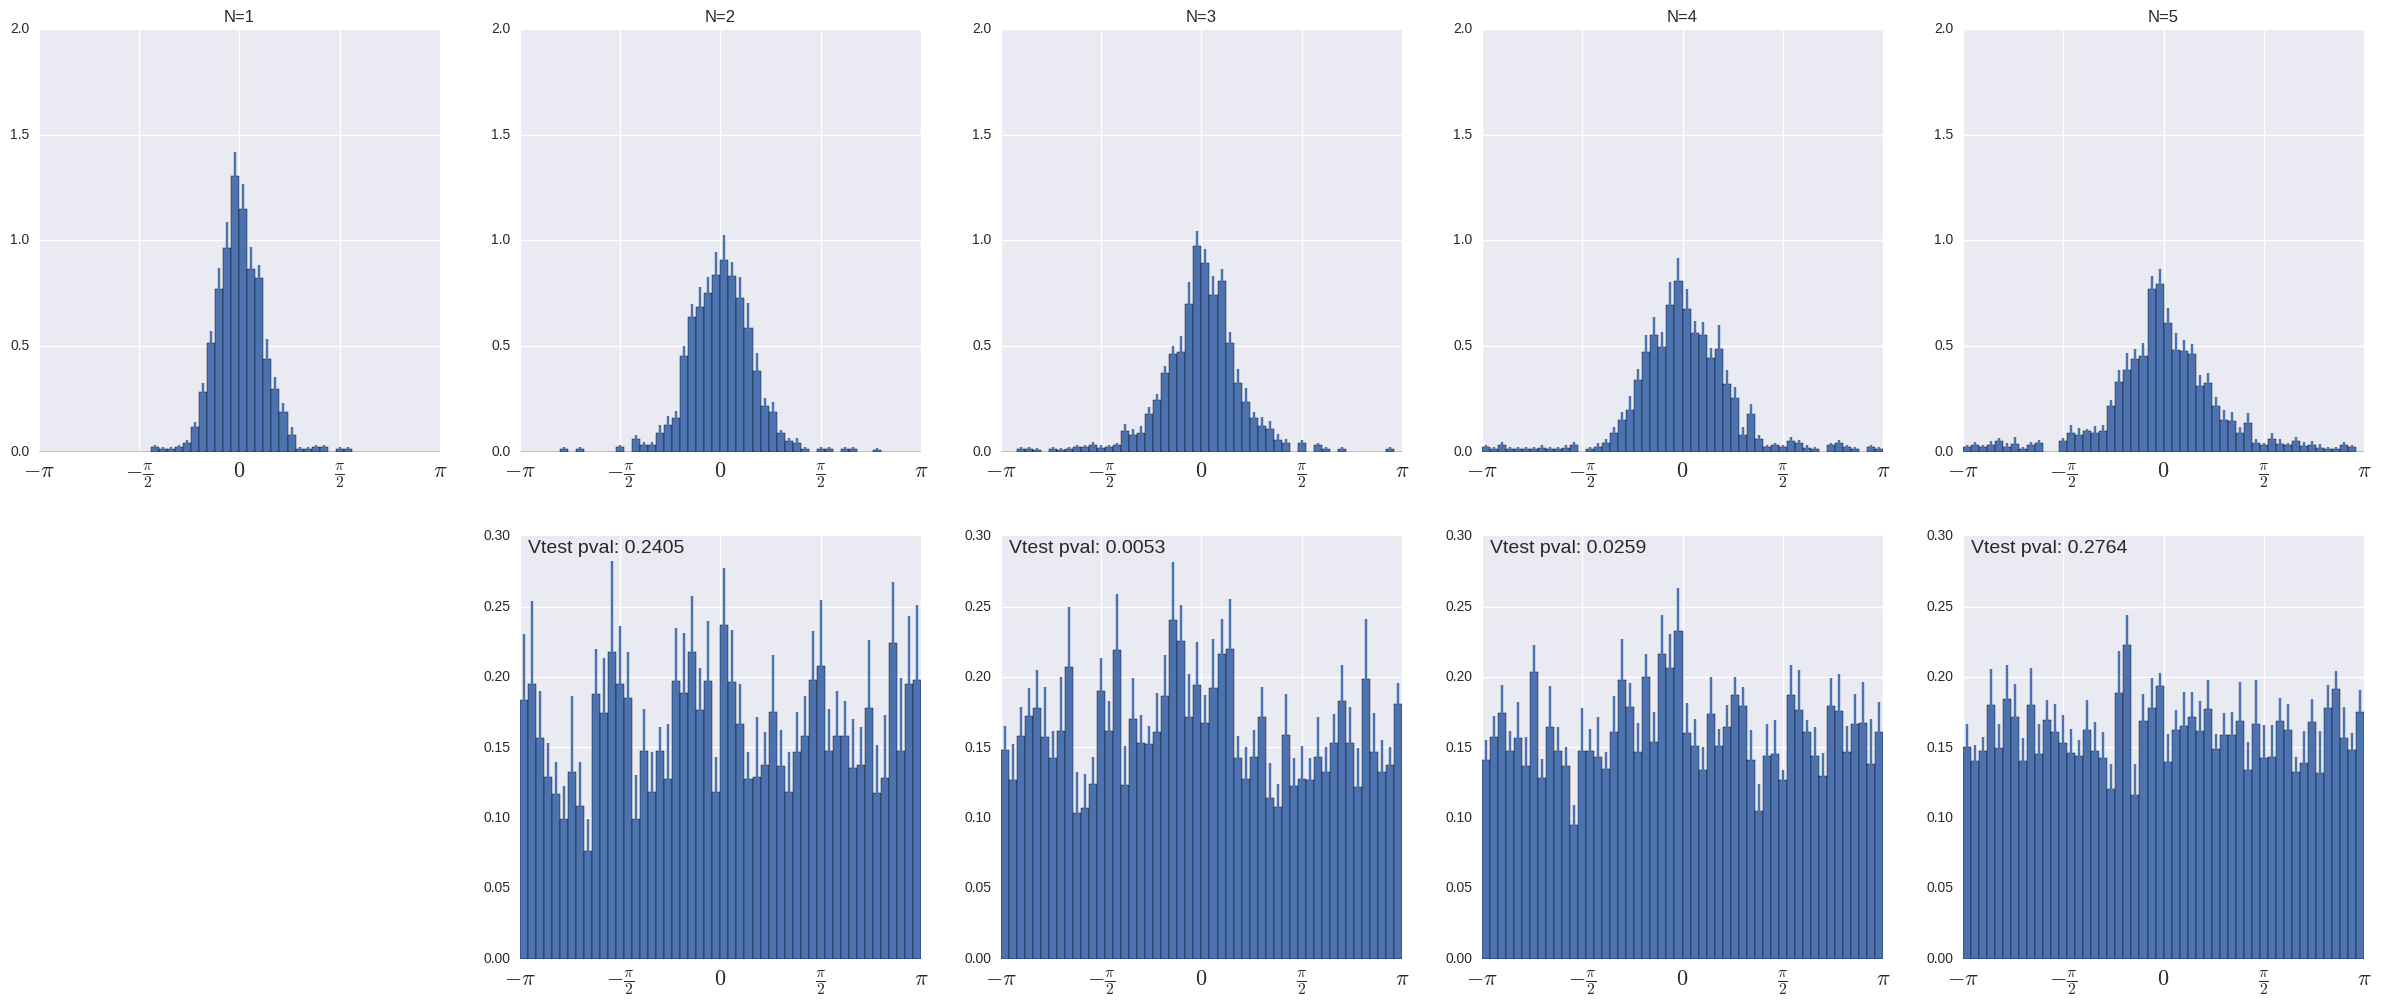

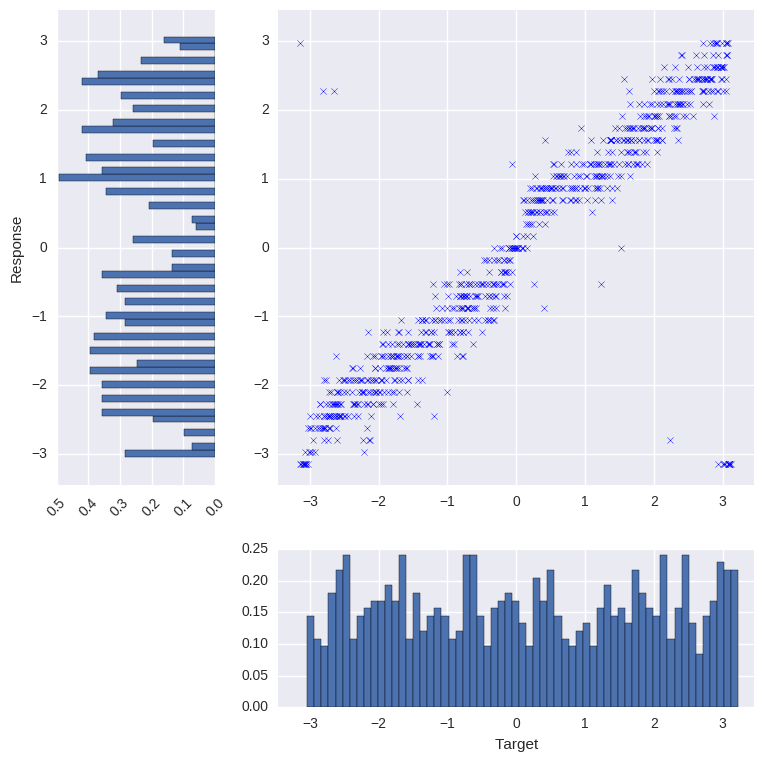

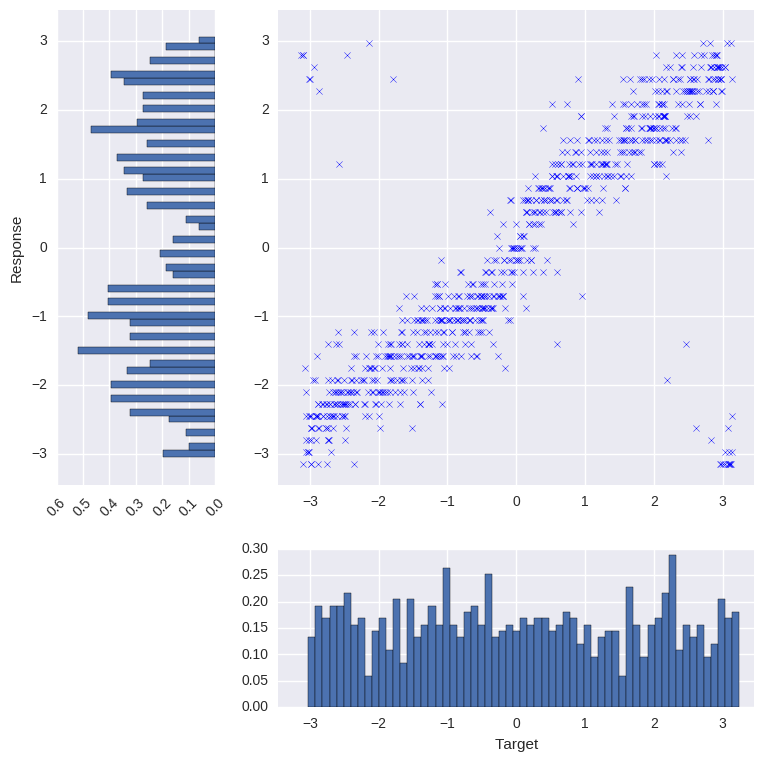

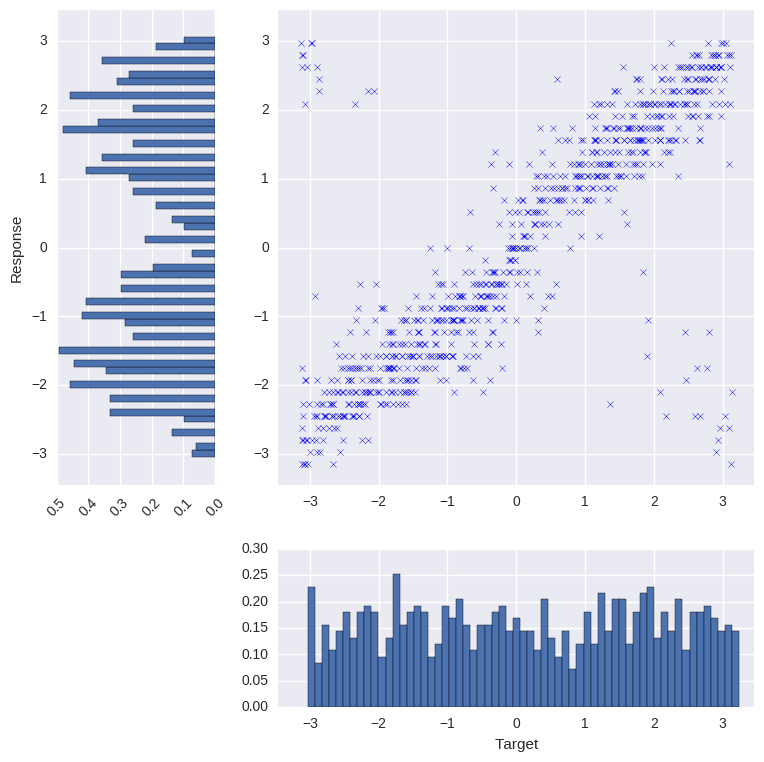

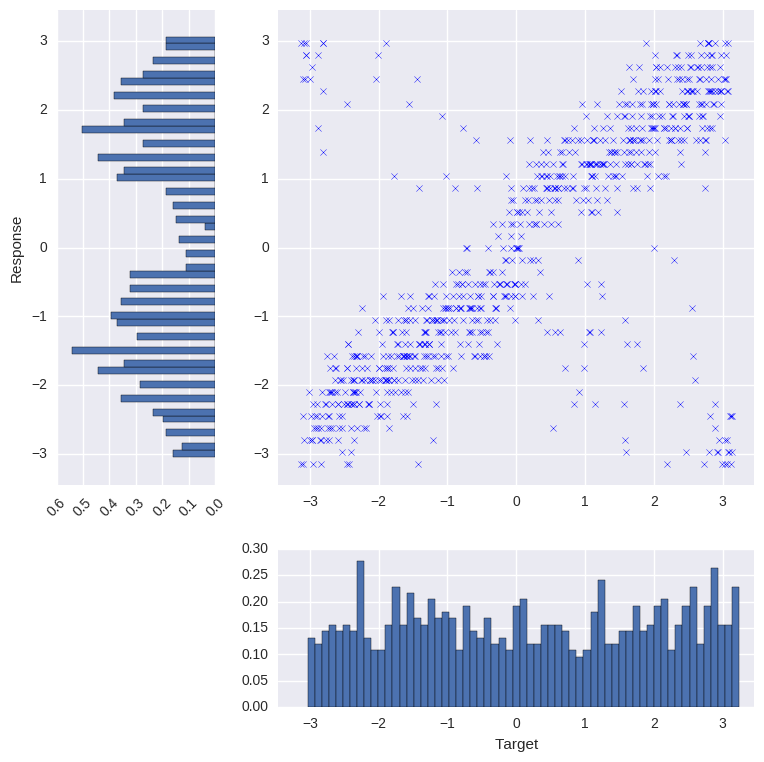

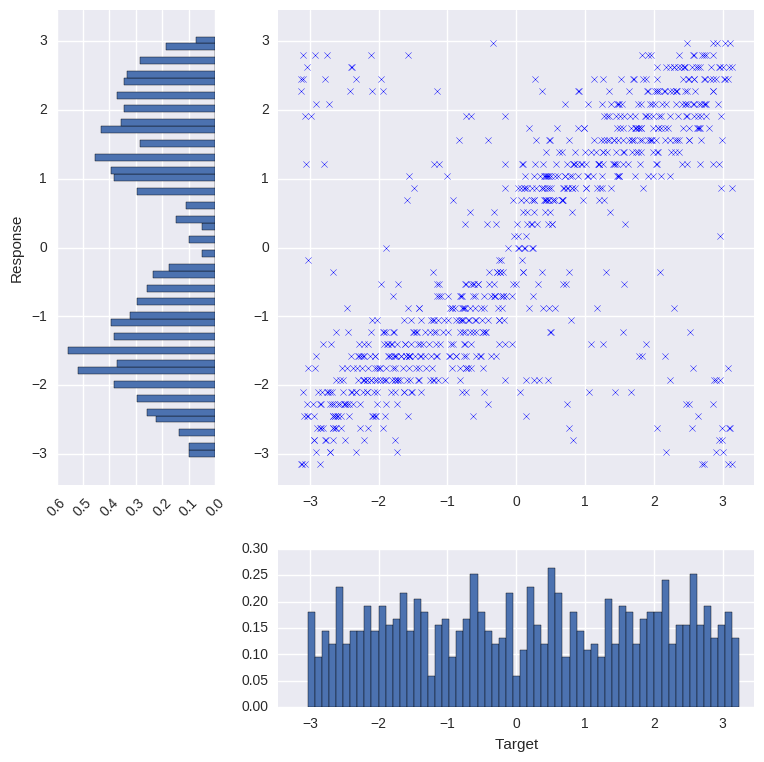

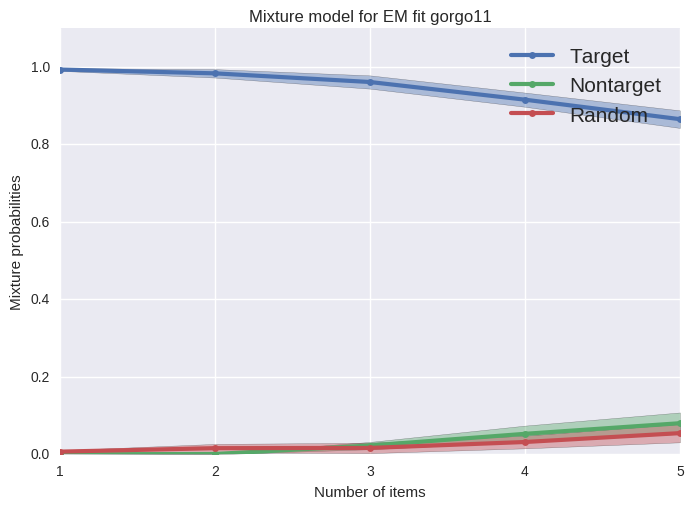

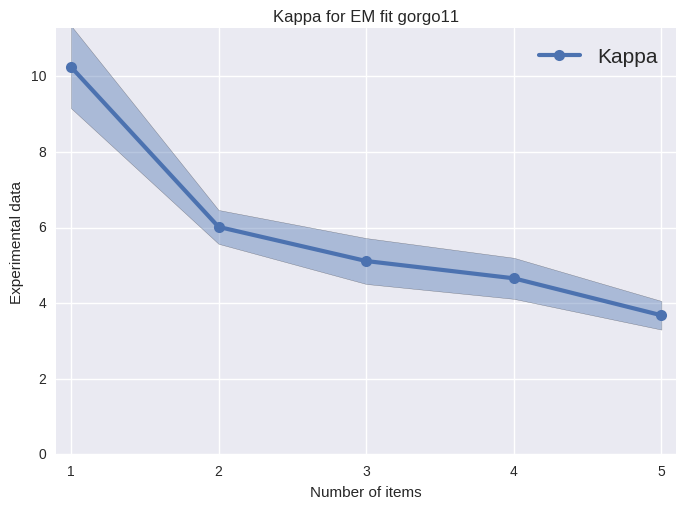

In [23]:
# Ground truth
print 'WARNING, THIS IS FITTED ON FULL DATA, NOT 500 FIRST SAMPLES AS OUR MODEL'
plots_experimental_data.plots_bays2009(data_groundtruth)

# Plot best
def plot_modelfits(T_space, curr_result_emfits_t, labelplot='', dataio=None):
    curr_result_avg = np.mean(curr_result_emfits_t, axis=-1)
    curr_result_std = np.std(curr_result_emfits_t, axis=-1)
    
    f, ax = plt.subplots()    
    ax = plots_experimental_data.plot_kappa_mean_error(T_space, curr_result_avg[..., 0], curr_result_std[..., 0], title=labelplot, ax=ax, label='Kappa', xlabel='Number of items')

    if dataio is not None:
        dataio.save_current_figure('bestfit_%s_kappa_{label}_{unique_id}.pdf' % labelplot)

    f, ax = plt.subplots()
    ax = plots_experimental_data.plot_emmixture_mean_error(T_space, curr_result_avg[..., 1], curr_result_std[..., 1], title=labelplot, label='Target', xlabel='Number of items', ax=ax)
    ax = plots_experimental_data.plot_emmixture_mean_error(T_space, curr_result_avg[..., 2], curr_result_std[..., 2], title=labelplot, label='Nontarget', xlabel='Number of items', ax=ax)
    ax = plots_experimental_data.plot_emmixture_mean_error(T_space, curr_result_avg[..., 3], curr_result_std[..., 3], title=labelplot, label='Random', xlabel='Number of items', ax=ax)
    
    if dataio is not None:
        dataio.save_current_figure('bestfit_%s_mixttarget_{label}_{unique_id}.pdf' % labelplot)

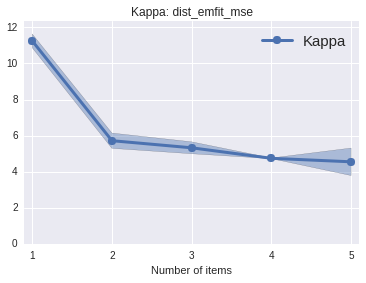

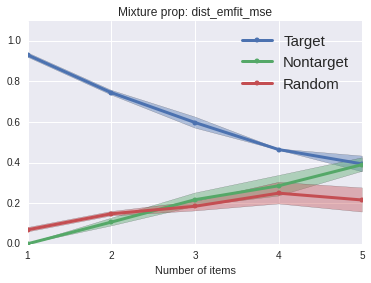

In [126]:
# Best fit for EM MSE
@interact(best_index=(0, 9, 1), metric=['dist_emfit_mse', 'dist_emfit_kl', 'dist_nll', 'dist_nll90'])
def plot_model_fit(metric='dist_emfit_mse', best_index=0):
    df_sorted = sort_df_best_params(df_best_fits, metric, max_best_params)
    plot_modelfits(T_space, result_em_fits_flat[df_sorted.index[best_index]], metric)

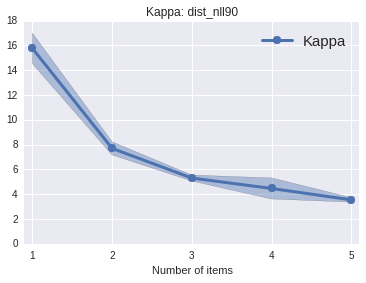

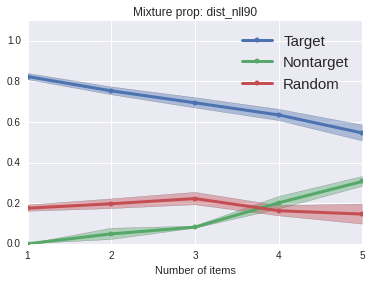

In [131]:
# Best fit for NLL90
@interact(best_index=(0, 9, 1), metric=['dist_emfit_mse', 'dist_emfit_kl', 'dist_nll', 'dist_nll90'])
def plot_model_fit(metric='dist_nll90', best_index=0):
    df_sorted = sort_df_best_params(df_best_fits, metric, max_best_params)
    plot_modelfits(T_space, result_em_fits_flat[df_sorted.index[best_index]], metric)

In [128]:
# Compute EM Mixture fits on subset of data used by our model, to compare LL and BIC properly
dataset = data_groundtruth
responses_subset = np.empty((T_space.size, 500))
targets_subset = np.empty((T_space.size, 500))
nontargets_subset = np.empty((T_space.size, 500, T_space[-1] - 1))

for T_i, T in enumerate(T_space):
    responses_subset[T_i] = dataset['data_to_fit'][T]['response'][:500]
    targets_subset[T_i] = dataset['data_to_fit'][T]['item_features'][:500, 0, 0]
    nontargets_subset[T_i, :, :(T-1)] = dataset['data_to_fit'][T]['item_features'][:500, 1:T, 0]

params_fit = em_circularmixture_parametrickappa.fit(T_space,
        responses_subset, targets_subset, nontargets_subset, debug=False)

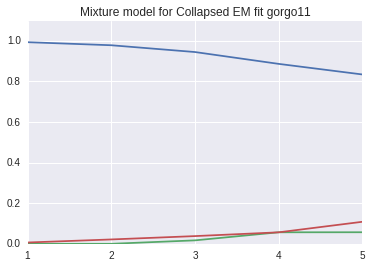

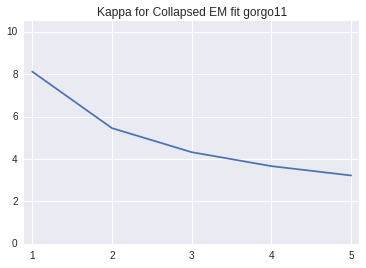

In [129]:
f, ax = plt.subplots()

ax.plot(T_space, params_fit['mixt_target'])
ax.plot(T_space, params_fit['mixt_nontargets'])
ax.plot(T_space, params_fit['mixt_random'])

ax.legend(prop={'size':15})

ax.set_title('Mixture model for Collapsed EM fit %s' % dataset['name'])
ax.set_xlim([1.0, T_space.max()])
ax.set_ylim([0.0, 1.1])
ax.set_xticks(range(1, T_space.max()+1))
ax.set_xticklabels(range(1, T_space.max()+1))

f.canvas.draw()

# Kappa
f, ax = plt.subplots()

ax.plot(T_space, params_fit['kappa'])

ax.legend(prop={'size':15})
ax.set_title('Kappa for Collapsed EM fit %s' % dataset['name'])
ax.set_xlim([0.9, T_space.max()+0.1])
ax.set_ylim([0.0, np.max(dataset['collapsed_em_fits']['mean']['kappa'])*1.1])
ax.set_xticks(range(1, T_space.max()+1))
ax.set_xticklabels(range(1, T_space.max()+1))
ax.get_figure().canvas.draw()

In [130]:
# BIC now
print 'EM Model NLL: ', -params_fit['train_LL']
print 'EM Model BIC: ', params_fit['bic']
print

# Our Model BIC:
print 'Model BIC is around 6000'
print 'Our model BIC, for good fit, best_index 0:'
print '[1284] 33.0000 0.7576 0.0576 0.1749 >> 36.4041 1.0582 2894.6525 2055.7256 5913.5973'

EM Model NLL:  2199.85089219
EM Model BIC:  4508.56899789

Model BIC is around 6000
Our model BIC, for good fit, best_index 0:
[1284] 33.0000 0.7576 0.0576 0.1749 >> 36.4041 1.0582 2894.6525 2055.7256 5913.5973


# Observations

Fits are all right, but not amazing either.

The lapse rate is pretty high and the probability of making non-target responses is higher than in the data.

Fits also have worst BIC than for Bays09, which kinda supports the idea that this dataset is just harder to fit. Funnily, this is also the case for the EM Mixture model summary statistics, they have pretty bad BIC compared to Bays09.

Should treat subjects better still though.

# Using new FitExperiment codebase


In [33]:
df_bestparams_nll = df_best_fits.sort_values(by='dist_nll', ascending=True).head(1).median()
df_bestparams_nll

M                       33.000000
ratio_conj               0.757576
sigmax                   0.057625
lapse_rate               0.174950
dist_emfit_mse          36.404067
dist_emfit_kl            1.058230
dist_nll              2894.652544
dist_nll90            2055.725617
dist_bic              5913.597250
dist_emfit_mse_log       3.594681
dist_nll_log             7.970620
dtype: float64

In [34]:
# Check best parameters
experiment_parameters = dict(action_to_do='launcher_do_fitexperiment_allmetrics',
                             inference_method='none',
                             experiment_id='gorgo11',
                             selection_method='last',
                             renormalize_sigma=None,
                             sigmay=0.00001,
                             num_samples=100,
                             code_type='mixed',
                             slice_width=0.07,
                             burn_samples=50,
                             ratio_conj=0.7,
                             stimuli_generation_recall='random',
                             autoset_parameters=None,
                             filter_datapoints_size=500, 
                             filter_datapoints_selection='random'
                             )

experiment_parameters.update(df_bestparams_nll)
for key in ['M']:
    experiment_parameters[key] = int(experiment_parameters[key])

with io.capture_output(display=False, stdout=True) as captured:
    experiment_launcher = ExperimentLauncher(run=True, arguments_dict=experiment_parameters)
    fit_exp = experiment_launcher.all_vars['fit_exp']
    results = experiment_launcher.all_vars['all_outputs_data']
    plots_fit_exp = PlotsFitExperimentAllTPaperTheo(fit_exp)
        

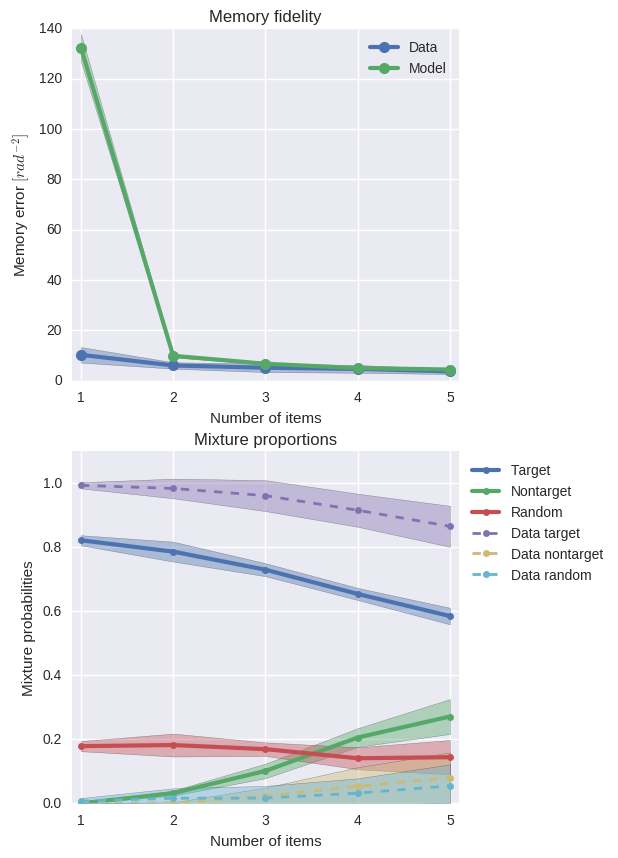

In [35]:
with io.capture_output(display=False, stdout=True) as captured:
    axesFig6Fig13 = plots_fit_exp.plots_memmixtcurves_fig6fig13(num_repetitions=5, use_cache=True)
    axesFig6Fig13[0].figure.set_size_inches((5, 10))